

![Imagen](https://sistemab.org/wp-content/uploads/2019/01/UPC_LOGO_COMPLETO-02-01-004-1.jpg)

# Trabajo Parcial 2020-02
# Quoridor

Sección: WV72
Docente: Canaval Sánchez. Luis Martín.

Integrantes:

Basauri Bazalar. Joao Arturo (u201716123)

## Introducción: 
El presente proyecto sera llevado a cabo por estudiantes de la Universidad Peruana de Ciencias Aplicadas pertenecientes al curso de Complejidad Algorítmica. Para ello, se utilizará el lenguaje de programación Python.

Cuando hablamos de complejidad algorítmica nos referimos a la la cantidad de recursos que necesita un algoritmo para darle una solución a los problemas que se presenten de manera óptima y eficiente. Asimismo, el estudiante deberá poder analizar la complejidad o hacer un análisis asintótico de estos, de tal manera que permitirá medir el costo tanto en tiempo como en recursos que consumen dichos algoritmos, el cual, servirá para poder identificar la eficiencia y escoger qué algoritmo es el óptimo. 

Quoridor se trata de un juego formado por un tablero de 9x9 en el que pueden participar hasta 4 jugadores. Cada jugador dispone de una ficha. Además, existen 20 barreras que serán repartidas equitativamente entre los jugadores. El objetivo del juego es que uno de los jugadores llegue al otro extremo del tablero antes que sus oponentes. Durante su turno el jugador podra optar moverse o colocar una barrera. Si eligen moverse podrá hacerlo tanto horizontal como verticalmente, así como avanzar o retroceder. Dicho movimiento será de 1 casilla salvo que el oponente se encuentre en la casilla inmediatamente siguiente. En este caso el jugador podrá efectuar un movimiento diagonal. Asimismo, la ficha jamás podra atravesar una barrera, deberá buscar un camino libre.

## Estado del arte

Gran parte de las investigaciones y soluciones previas se apoyan en Machine learning. Entre ellas destacan:

-  Mastering Quoridor (Glendening 2005)

Para su desarrollo se implementó un algoritmo de búsqueda, haciendo uso de el algoritmo de búsqueda iterativo-dependiente alfa-beta negamax con algunas modificaciones. Para la función de evaluación, las diez características elegidas fueron: El camino más corto, Cadenas de Markov, Goal Side, Distancia Manhattan para ambos jugadores y Distancia al peón y número de barreras de el jugador actual.
    
- A Quoridor-Playing Agent (Mertens 2006)

En este caso se emplea un algoritmo MiniMax y pruning Alfa-Beta. No obstante, el árbol del juego es demasiado grande para que se ejecute la búsqueda a lo largo del árbol todo el camino hasta los hijos. Así que  la solución fue limitar dicho algoritmo. Posteriormente, se aplica una función que evalúa y determina el valor de una posición para permitir un regreso más rápido. El resultado de todo esto es poco efectivo ya que el agente no es capaz de comprender la profundidad del juego.

## Metodología

- Complejidad del juego

Para evaluar la complejidad de Quoridor podemos considerar el numero de movimientos de la ficha multiplicados por el numero de posibles maneras de colocar las barreras. Dado que el tablero dispone de 81 casillas, es posible colocar la primera ficha en cualquiera de ellas y la segunda en la casilla 80, ya que la primera ficha ya se encuentra colocada en el tablero. Por lo tanto, si consideramos dos jugadores, el numero total de posiciones viene dado por la ecuación:

<img src="https://imgur.com/wg5NixA.jpg">

En cuanto a las barreras, dado que cada barrera ocupa dos casillas, existen 8 maneras de colocar una barrera en una fila. Como existen 8 filas, significa que hay 64 lugares posibles para colocar la barrera. Sin embargo, puesto que el tablero es cuadrado, dicha cifra se duplica hasta los 128. Es necesario considerar que una barrera ocupa 4 posibles posiciones, a excepción de las casillas presentes en los bordes. A continuación se muestra el numero de posiciones de las 20 barreras (1) y el conjunto de todas las posibles configuraciones (2):

<img src="https://imgur.com/Erkdgil.jpg">

<img src="https://imgur.com/TzbdG23.jpg">

Para este proyecto debemos aplicar 3 algoritmos para que la ficha llegue al otro extremo del tablero en la menor cantidad de movimientos posible. Para ello, como idea inicial planteamos representar el tablero como un grafo, donde cada celda esta representada por 4 vértices. A continuación se muestran los algoritmos que intentarán implementar cada estudiante:

- Algoritmo de Dijkstra.- La idea subyacente en este algoritmo consiste en ir explorando todos los caminos más cortos que parten del vértice origen y que llevan a todos los demás vértices; cuando se obtiene el camino más corto desde el vértice origen hasta el resto de los vértices que componen el grafo, el algoritmo se detiene. Con la complejidad de  O(|E|+|V|⋅log(|V|))

- Algoritmo Bellman-Ford.-
Inicialmente, la distancia del nodo origen a uno cualquiera es infinito, salvo la distancia al propio nodo origen que será 0, e iteración tras iteración mejoraremos las distancias. La idea detrás del algoritmo es considerar los caminos saliendo del nodo origen y compuestos por dos nodos, luego los compuestos por tres, y así sucesivamente hasta llegar a caminos formados por n nodos, siendo n el número de vértices. Nótese que puesto que hemos asumido que no hay ciclos negativos, no es óptimo recorrer ciclos, y por ende, no es necesario mirar caminos de distancia mayor o igual a n, pues en ese caso estaríamos repitiendo algún nodo, es decir, estaríamos considerando únicamente caminos que contienen ciclos. Con la complejidad de  O(|E|⋅|V|) 

- Algoritmo Floyd-Warshall.- La idea del algoritmo es parecida a la de Bellman-Ford. Vamos a realizar n iteraciones, en cada iteración estaremos considerando los caminos óptimos que tienen como nodos intermedios aquellos con índice menor a i (si los vértices están numerados de 0 a n-1; si estuviesen numerados de 1 a n entonces menor o igual a i). De modo que tras n iteraciones habremos considerado los caminos óptimos que incluyen cualquier nodo, es decir, los caminos óptimos en general. Con la complejidad de O(|V|3)  

##Matriz base a trabajar







 






In [ ]:
import networkx as nx
import math
import numpy as np
import matplotlib.pyplot as plt
import heapq


In [ ]:
def GrafoBase():
  G = nx.Graph()
  G.add_node(0, id = 0 ,nombre="0", pos=[1,9], color="orange")
  G.add_node(1, id = 1 ,nombre="1", pos=[2,9], color="orange")
  G.add_node(2, id = 2 ,nombre="2", pos=[3,9], color="orange")
  G.add_node(3, id = 3 ,nombre="3", pos=[4,9], color="orange")
  G.add_node(4, id = 4 ,nombre="4", pos=[5,9], color="orange")
  G.add_node(5, id = 5 ,nombre="5", pos=[6,9], color="orange")
  G.add_node(6, id = 6 ,nombre="6", pos=[7,9], color="orange")
  G.add_node(7, id = 7 ,nombre="7", pos=[8,9], color="orange")
  G.add_node(8, id = 8 ,nombre="8", pos=[9,9], color="orange")

  G.add_node(9, id = 9 ,nombre="9", pos=[1,8], color="orange")
  G.add_node(10, id = 10 ,nombre="10", pos=[2,8], color='orange')
  G.add_node(11, id = 11 ,nombre="11", pos=[3,8], color='orange')
  G.add_node(12, id = 12 ,nombre="12", pos=[4,8], color='orange')
  G.add_node(13, id = 13 ,nombre="13", pos=[5,8], color='orange')
  G.add_node(14, id = 14 ,nombre="14", pos=[6,8], color='orange')
  G.add_node(15, id = 15 ,nombre="15", pos=[7,8], color='orange')
  G.add_node(16, id = 16 ,nombre="16", pos=[8,8], color='orange')
  G.add_node(17, id = 17 ,nombre="17", pos=[9,8], color='orange')

  G.add_node(18, id = 18 ,nombre="18", pos=[1,7], color="orange")
  G.add_node(19, id = 19 ,nombre="19", pos=[2,7], color="orange")
  G.add_node(20, id = 20 ,nombre="20", pos=[3,7], color="orange")
  G.add_node(21, id = 21 ,nombre="21", pos=[4,7], color="orange")
  G.add_node(22, id = 22 ,nombre="22", pos=[5,7], color="orange")
  G.add_node(23, id = 23 ,nombre="23", pos=[6,7], color="orange")
  G.add_node(24, id = 24 ,nombre="24", pos=[7,7], color="orange")
  G.add_node(25, id = 25 ,nombre="25", pos=[8,7], color="orange")
  G.add_node(26, id = 26 ,nombre="26", pos=[9,7], color="orange")

  G.add_node(27, id = 27 ,nombre="27", pos=[1,6], color="orange")
  G.add_node(28, id = 28 ,nombre="28", pos=[2,6], color="orange")
  G.add_node(29, id = 29 ,nombre="29", pos=[3,6], color="orange")
  G.add_node(30, id = 30 ,nombre="30", pos=[4,6], color="orange")
  G.add_node(31, id = 31 ,nombre="31", pos=[5,6], color="orange")
  G.add_node(32, id = 32 ,nombre="32", pos=[6,6], color="orange")
  G.add_node(33, id = 33 ,nombre="33", pos=[7,6], color="orange")
  G.add_node(34, id = 34 ,nombre="34", pos=[8,6], color="orange")
  G.add_node(35, id = 35 ,nombre="35", pos=[9,6], color="orange")

  G.add_node(36, id = 36 ,nombre="36", pos=[1,5], color="orange")
  G.add_node(37, id = 37 ,nombre="37", pos=[2,5], color="orange")
  G.add_node(38, id = 38 ,nombre="38", pos=[3,5], color="orange")
  G.add_node(39, id = 39 ,nombre="39", pos=[4,5], color="orange")
  G.add_node(40, id = 40 ,nombre="40", pos=[5,5], color="orange")
  G.add_node(41, id = 41 ,nombre="41", pos=[6,5], color="orange")
  G.add_node(42, id = 42 ,nombre="42", pos=[7,5], color="orange")
  G.add_node(43, id = 43 ,nombre="43", pos=[8,5], color="orange")
  G.add_node(44, id = 44 ,nombre="44", pos=[9,5], color="orange")

  G.add_node(45, id = 45 ,nombre="45", pos=[1,4], color="orange")
  G.add_node(46, id = 46 ,nombre="46", pos=[2,4], color="orange")
  G.add_node(47, id = 47 ,nombre="47", pos=[3,4], color="orange")
  G.add_node(48, id = 48 ,nombre="48", pos=[4,4], color="orange")
  G.add_node(49, id = 49 ,nombre="49", pos=[5,4], color="orange")
  G.add_node(50, id = 50 ,nombre="50", pos=[6,4], color="orange")
  G.add_node(51, id = 51 ,nombre="51", pos=[7,4], color="orange")
  G.add_node(52, id = 52 ,nombre="52", pos=[8,4], color="orange")
  G.add_node(53, id = 53 ,nombre="53", pos=[9,4], color="orange")

  G.add_node(54, id = 54 ,nombre="54", pos=[1,3], color="orange")
  G.add_node(55, id = 55 ,nombre="55", pos=[2,3], color="orange")
  G.add_node(56, id = 56 ,nombre="56", pos=[3,3], color="orange")
  G.add_node(57, id = 57 ,nombre="57", pos=[4,3], color="orange")
  G.add_node(58, id = 58 ,nombre="58", pos=[5,3], color="orange")
  G.add_node(59, id = 59 ,nombre="59", pos=[6,3], color="orange")
  G.add_node(60, id = 60 ,nombre="60", pos=[7,3], color="orange")
  G.add_node(61, id = 61 ,nombre="61", pos=[8,3], color="orange")
  G.add_node(62, id = 62 ,nombre="62", pos=[9,3], color="orange")

  G.add_node(63, id = 63 ,nombre="63", pos=[1,2], color="orange")
  G.add_node(64, id = 64 ,nombre="64", pos=[2,2], color="orange")
  G.add_node(65, id = 65 ,nombre="65", pos=[3,2], color="orange")
  G.add_node(66, id = 66 ,nombre="66", pos=[4,2], color="orange")
  G.add_node(67, id = 67 ,nombre="67", pos=[5,2], color="orange")
  G.add_node(68, id = 68 ,nombre="68", pos=[6,2], color="orange")
  G.add_node(69, id = 69 ,nombre="69", pos=[7,2], color="orange")
  G.add_node(70, id = 70 ,nombre="70", pos=[8,2], color="orange")
  G.add_node(71, id = 71 ,nombre="71", pos=[9,2], color="orange")

  G.add_node(72, id = 72 ,nombre="72", pos=[1,1], color="orange")
  G.add_node(73, id = 73 ,nombre="73", pos=[2,1], color="orange")
  G.add_node(74, id = 74 ,nombre="74", pos=[3,1], color="orange")
  G.add_node(75, id = 75 ,nombre="75", pos=[4,1], color="orange")
  G.add_node(76, id = 76 ,nombre="76", pos=[5,1], color="orange")
  G.add_node(77, id = 77 ,nombre="77", pos=[6,1], color="orange")
  G.add_node(78, id = 78 ,nombre="78", pos=[7,1], color="orange")
  G.add_node(79, id = 79 ,nombre="79", pos=[8,1], color="orange")
  G.add_node(80, id = 80 ,nombre="80", pos=[9,1], color="orange")

  G.add_edges_from([(0,1),(0,9),
                    (1,2),(1,10),
                    (2,3),(2,11),
                    (3,4),(3,12),
                    (4,5),(4,13),
                    (5,6),(5,14),
                    (6,7),(6,15),
                    (7,8),(7,16),
                    (8,17)
                    ])
  
  G.add_edges_from([
                    (9,10),(9,18),
                    (10,11),(10,19),
                    (11,12),(11,20),
                    (12,13),(12,21),
                    (13,14),(13,22),
                    (14,15),(14,23),
                    (15,16),(15,24),
                    (16,17),(16,25),
                    (17,26)
                    ])
  
  G.add_edges_from([
                    (18,19),(18,27),
                    (19,20),(19,28),
                    (20,21),(20,29),
                    (21,22),(21,30),
                    (22,23),(22,31),
                    (23,24),(23,32),
                    (24,25),(24,33),
                    (25,26),(25,34),
                    (26,35)
                    ])
  
  G.add_edges_from([
                    (27,28),(27,36),
                    (28,29),(28,37),
                    (29,30),(29,38),
                    (30,31),(30,39),
                    (31,32),(31,40),
                    (32,33),(32,41),
                    (33,34),(33,42),
                    (34,35),(34,43),
                    (35,44)
                    ])
  
  G.add_edges_from([
                    (36,37),(36,45),
                    (37,38),(37,46),
                    (38,39),(38,47),
                    (39,40),(39,48),
                    (40,41),(40,49),
                    (41,42),(41,50),
                    (42,43),(42,51),
                    (43,44),(43,52),
                    (44,53)
                    ])
  
  G.add_edges_from([
                    (45,46),(45,54),
                    (46,47),(46,55),
                    (47,48),(47,56),
                    (48,49),(48,57),
                    (49,50),(49,58),
                    (50,51),(50,59),
                    (51,52),(51,60),
                    (52,53),(52,61),
                    (53,62)
                    ])
  
  G.add_edges_from([
                    (54,55),(54,63),
                    (55,56),(55,64),
                    (56,57),(56,65),
                    (57,58),(57,66),
                    (58,59),(58,67),
                    (59,60),(59,68),
                    (60,61),(60,69),
                    (61,62),(61,70),
                    (62,71)
                    ])
  
  G.add_edges_from([
                    (63,64),(63,72),
                    (64,65),(64,73),
                    (65,66),(65,74),
                    (66,67),(66,75),
                    (67,68),(67,76),
                    (68,69),(68,77),
                    (69,70),(69,78),
                    (70,71),(70,79),
                    (71,80)
                    ])
  
  G.add_edges_from([
                    (72,73),
                    (73,74),
                    (74,75),
                    (75,76),
                    (76,77),
                    (77,78),
                    (78,79),
                    (79,80)
                    ])
  return G

In [ ]:
def color(G,j1,j2):
  color_map = []
  for node in G:
      if node == j1:
          color_map.append('orange')
      else: 
          color_map.append('gray')  

  color2(color_map,G,j2)
  return color_map

In [ ]:
def color2(c,G,n):
  for node in G:
    if node == n:
      c[n]='red'
  return c

In [ ]:
## Matriz de adyacencia del tablero
GAL = [[(1,1),(9,1)],
       [(2,1),(10,1)],
       [(3,1),(11,1)],
       [(4,1),(12,1)],
       [(5,1),(13,1)],
       [(6,1),(14,1)],
       [(7,1),(15,1)],
       [(8,1),(16,1)],
       [(17,1)],
       [(10,1),(18,1)],
       [(11,1),(19,1)],
       [(12,1),(20,1)],
       [(13,1),(21,1)],
       [(14,1),(22,1)],
       [(15,1),(23,1)],
       [(16,1),(24,1)],
       [(17,1),(25,1)],
       [(26,1)],
       [(19,1),(27,1)],
       [(20,1),(28,1)],
       [(21,1),(29,1)],
       [(22,1),(30,1)],
       [(23,1),(31,1)],
       [(24,1),(32,1)],
       [(25,1),(33,1)],
       [(26,1),(34,1)],
       [(35,1)],
       [(28,1),(36,1)],
       [(29,1),(37,1)],
       [(30,1),(38,1)],
       [(31,1),(39,1)],
       [(32,1),(40,1)],
       [(33,1),(41,1)],
       [(34,1),(42,1)],
       [(35,1),(43,1)],
       [(44,1)],
       [(37,1),(45,1)],
       [(38,1),(46,1)],
       [(39,1),(47,1)],
       [(40,1),(48,1)],
       [(41,1),(49,1)],
       [(42,1),(50,1)],
       [(43,1),(51,1)],
       [(44,1),(52,1)],
       [(53,1)],
       [(46,1),(54,1)],
       [(47,1),(55,1)],
       [(48,1),(56,1)],
       [(49,1),(57,1)],
       [(50,1),(58,1)],
       [(51,1),(59,1)],
       [(52,1),(60,1)],
       [(53,1),(61,1)],
       [(62,1)],
       [(55,1),(63,1)],
       [(56,1),(64,1)],
       [(57,1),(65,1)],
       [(58,1),(66,1)],
       [(59,1),(67,1)],
       [(60,1),(68,1)],
       [(61,1),(69,1)],
       [(62,1),(70,1)],
       [(71,1)],
       [(64,1),(72,1)],
       [(65,1),(73,1)],
       [(66,1),(74,1)],
       [(67,1),(75,1)],
       [(68,1),(76,1)],
       [(69,1),(77,1)],
       [(70,1),(78,1)],
       [(71,1),(79,1)],
       [(80,1)],
       [(73,1)],
       [(74,1)],
       [(75,1)],
       [(76,1)],
       [(77,1)],
       [(78,1)],
       [(79,1)],
       [(80,1)],
       []]

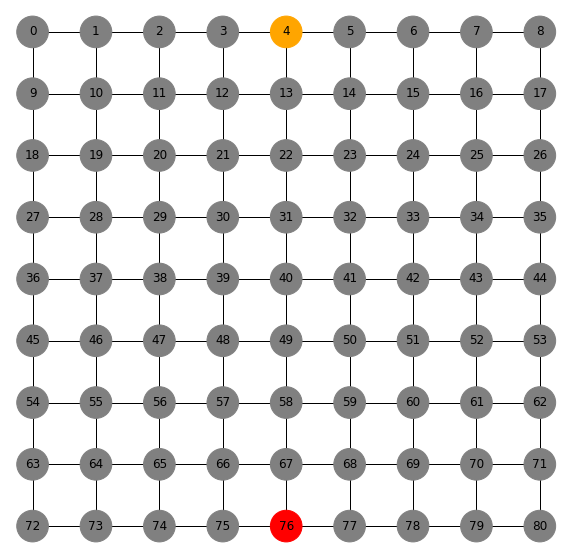

In [ ]:
##Dibujar el tablero
G = GrafoBase()
color_map = color(G,4,76)

plt.figure(1, figsize=(10,10))
pos_nodos=[(x,y) for x,y in nx.get_node_attributes(G,'pos').values()]
nx.draw_networkx_nodes(G, pos_nodos, node_size=1000, node_color=color_map)
nx.draw_networkx_labels(G,pos_nodos)
nx.draw_networkx_edges(G,pos_nodos)
plt.axis('off')
plt.show()

##Experimentacion
- Algoritmo Disktra:



In [ ]:
def dijkstra(G, s):
    n = len(G)
    visited = [False]*n
    weights = [math.inf]*n
    path = [None]*n
    queue = []
    weights[s] = 0
    heapq.heappush(queue, (0, s))
    while len(queue) > 0:
        g, u = heapq.heappop(queue)
        visited[u] = True
        for v, w in G[u]:
            if not visited[v]:
                f = g + w
                if f < weights[v]:
                    weights[v] = f
                    path[v] = u
                    heapq.heappush(queue, (f, v))
    return path, weights


Con la implemtacion de dijkstra planeamos recuperar el arreglo Path y utlizar su segundo valor (Path[1]), debido a que el primero es nulo, para el moviento del jugardor, después realizar lo mismo para el segundo jugador y después volver a iniciar dijkstra para continuar con el juego quoridor hasta tener un ganador.  

Para los 2 siguientes algoritmos utlizaremos en mismo planteamiento. Recuperar el arrgle Path y usar su segundo valor para sobreescribir su posicion, seguir con el segundo jugador y repetir el proceso hasta tener un ganador. 

- Algoritmo Bellman-Ford


In [ ]:
def bellmanFord(G, start):
  n = len(G)
  d=[math.inf]*n
  p=[None]*n
  d[start]=0
  for _ in range(n-1):
    for u in range(n):
      for v, w in G[u]:
        if d[v]>d[u]+w:
          d[v]=d[u]+w
          p[v]=u

  for u in range(n):
    for v, w in G[u]:
      if d[v]>d[u]+w:
        print("ciclo negativo")
        return

  return p,d

- Algoritmo Floyd-Warshall

In [ ]:
def floydwarshall(G):
  n = len(G)
  dist = [[math.inf]*n for _ in range(n)]
  path =[[-1]*n for _ in range(n)] 
  for u in range(n):
    dist[u][u]=0 
  for u in range(n):
    for v,w in G[u]:
      dist[u][v]=w
      path[u][v]=u 
  for k in range(n):
    for i in range(n):
      for j in range(n): 
        if dist[i][j]>dist[i][k]+dist[k][j]:
          dist[i][j]=dist[i][k]+dist[k][j]
          path[i][j]=k


In [ ]:
##Quoridor con Dijkstra
def quoridorD(G,j1,j2):
    if (j1 == 72 or j1 == 73 or j1 == 74 or j1 == 75 or j1 == 76 or j1 == 77 or j1 == 78 or j1 == 79 or j1 == 80) or (j2 == 0 or j2 == 1 or j2 == 2 or j2 == 3 or j2 == 4 or j2 == 5 or j2 == 6 or j2 == 7 or j2 == 8):
      return j1 , j2
    else: 
      p1,w1 = dijkstra(G,j1) ##jugador 1
      j1 = p1[1]
      p2,w2 = dijkstra(G,j2) ##jugador 2
      j2 = p2[1]
      quoridor(G,j1,j2)

In [ ]:

##Quoridor con Bellman-Ford
def quoridorB(G,j1,j2):
    if (j1 == 72 or j1 == 73 or j1 == 74 or j1 == 75 or j1 == 76 or j1 == 77 or j1 == 78 or j1 == 79 or j1 == 80) or (j2 == 0 or j2 == 1 or j2 == 2 or j2 == 3 or j2 == 4 or j2 == 5 or j2 == 6 or j2 == 7 or j2 == 8):
      return j1 , j2
    else: 
      p1,w1 = bellmanFord(G,j1) ##jugador 1
      j1 = p1[1]
      p2,w2 = bellmanFord(G,j2) ##jugador 2
      j2 = p2[1]
      quoridor(G,j1,j2)

In [ ]:
##Quoridor con Flow-Warshall
def quoridorF(G,j1,j2):
    if (j1 == 72 or j1 == 73 or j1 == 74 or j1 == 75 or j1 == 76 or j1 == 77 or j1 == 78 or j1 == 79 or j1 == 80) or (j2 == 0 or j2 == 1 or j2 == 2 or j2 == 3 or j2 == 4 or j2 == 5 or j2 == 6 or j2 == 7 or j2 == 8):
      return j1 , j2
    else: 
      p1,w1 = dijkstra(G,j1) ##jugador 1
      j1 = p1[1]
      p2,w2 = dijkstra(G,j2) ##jugador 2
      j2 = p2[1]
      quoridor(G,j1,j2)

## Asignar Barreras

Debido a que cada algoritmo recibe el camino que realizara el jugador, se hara una comparacion de distancia entre los jugadores. Ello conllevará a que cuando la distancia de un jugador enmigo sea menor se colocara una barrera al frente de el (siendo valids la ubicacion de la barrera)

Entonces el programa seguiria el siguiente orden:
 - Calcula los caminos
 - Analiza si es necesario poner barrera
 - Mueve el jugador o pone la barrea (Actuliza la matriz)
 - Pasa al siguiente jugador 

##Conclusiones

Con los resultados optenidos planteamos que dijkstra es la mejor opcion para el desarollo del juego en terminos de complejidad y su resultado es el mas parecido a un juego real entre personas a nuestro parecer
